# A la découverte de l'océan : l'importance du niveau de la mer

In [45]:
import numpy as np
import netCDF4 as nc
import cartopy.crs as m
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
import scipy.io


## Cas d'étude : le 27 Octobre 2020

In [27]:
fn='SSH_20201027.nc'
ds=nc.Dataset(fn)
lat=ds['latitude'][:]
lon=ds['longitude'][:]
adt=np.squeeze(ds['adt'][:])
sla=np.squeeze(ds['sla'][:])
mdt=adt-sla

vgeos=np.squeeze(ds['vgos'][:])
ugeos=np.squeeze(ds['ugos'][:])


### Représentation de la MDT (Mean Dynamic Topography)

/Users/leaolivier/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/leaolivier/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


<function matplotlib.pyplot.show(*args, **kw)>

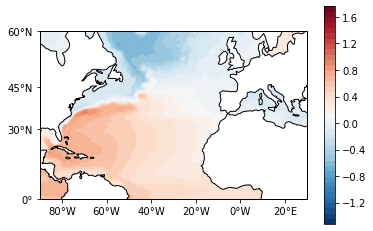

In [6]:
fig=plt.figure()
projection = m.Mercator()
ax=plt.axes(projection=m.Mercator(central_longitude=0.0, min_latitude=0.0, max_latitude=60.0))
filled_c=ax.contourf(lon,lat,mdt,50,transform=m.PlateCarree(),cmap='RdBu_r')
fig.colorbar(filled_c)
ax.coastlines()
ax.set_global()
ax.set_extent([-90, 30, 0, 60])
ax.set_xticks([-80,-60,-40,-20,0,20], crs=m.PlateCarree())
ax.set_yticks([0, 30, 45, 60], crs=m.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.show

### Représentation de l'ADT (Absolute Dynamic Topography)

<function matplotlib.pyplot.show(*args, **kw)>

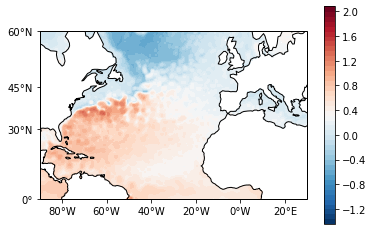

In [7]:
fig=plt.figure()
projection = m.Mercator()
ax=plt.axes(projection=m.Mercator(central_longitude=0.0, min_latitude=0.0, max_latitude=60.0))
filled_c=ax.contourf(lon,lat,adt,50,transform=m.PlateCarree(),cmap='RdBu_r')
fig.colorbar(filled_c)
ax.coastlines()
ax.set_global()
ax.set_extent([-90, 30, 0, 60])
ax.set_xticks([-80,-60,-40,-20,0,20], crs=m.PlateCarree())
ax.set_yticks([0, 30, 45, 60], crs=m.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.show

### Représentation des vitesses géostrophiques

<function matplotlib.pyplot.show(*args, **kw)>

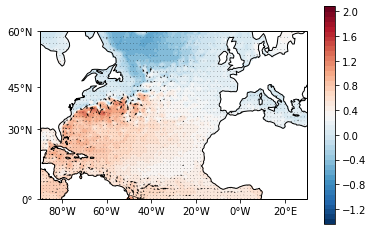

In [44]:
fig=plt.figure()
projection = m.Mercator()
ax=plt.axes(projection=m.Mercator(central_longitude=0.0, min_latitude=0, max_latitude=60.0))
filled_c=ax.contourf(lon,lat,adt,50,transform=m.PlateCarree(),cmap='RdBu_r')
ax.quiver(lon[::6], lat[::6], ugeos[::6,::6], vgeos[::6,::6], transform=m.PlateCarree())
fig.colorbar(filled_c)
ax.coastlines()
ax.set_global()
ax.set_extent([-90, 30, 0, 60])
ax.set_xticks([-80,-60,-40,-20,0,20], crs=m.PlateCarree())
ax.set_yticks([0, 30, 45, 60], crs=m.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.show

## Comparaison des moyennes d'ADT sur 1994-1999 & 2011-2016 

In [53]:
mat = scipy.io.loadmat('Mean_ADT_1994_1999.mat')
lat_1994_1999=mat['Lat_ADT'][:]
lon_1994_1999=mat['Lon_ADT'][:]
Mean_ADT_1994_1999=np.squeeze(mat['Mean_ADT_1994_1999'][:])
mat = scipy.io.loadmat('Mean_ADT_2011_2016.mat')
lat_2011_2016=mat['Lat_ADT'][:]
lon_2011_2016=mat['Lon_ADT'][:]
Mean_ADT_2011_2016=np.squeeze(mat['Mean_ADT_2011_2016'][:])

### Représentez la différence de MADT entre les deux périodes

## Hauteur Stérique

Le script suivant représente la hauteur stérique calculée avec les donnée du TP1 (résolution de 1°), c'est à dire les données de température et salinité du WOA.

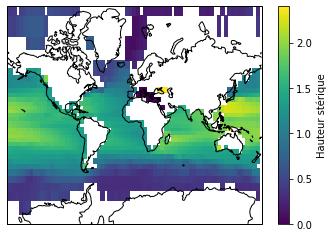

In [68]:
mat = scipy.io.loadmat('DH_WOA_LR.mat') 
DH_WOA=np.squeeze(mat['DH_WOA'][:])
lat_SH=np.squeeze(mat['lat'][:])
lon_SH=np.squeeze(mat['lon'][:])

fig=plt.figure()
ax=plt.axes(projection=m.Mercator())
ca=ax.pcolormesh(lon_SH,lat_SH,np.transpose(DH_WOA[:,:,0]),transform=m.PlateCarree(),vmin=0, vmax=2.4)
cbar=fig.colorbar(ca)
cbar.set_label('Hauteur stérique', rotation=90)
ax.coastlines()
ax.set_global()
plt.show()